In [1]:
# For ndarray handling:
import numpy as np

# For plotting:
import matplotlib
import matplotlib.pyplot as plt

# For deep learning functionality
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

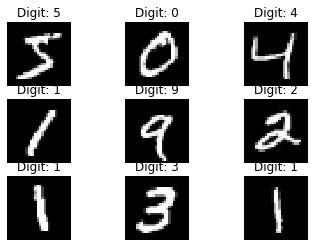

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Get the one-hot encoded labels
n_class = len(np.unique(y_train))
Y_train = np.eye(n_class)[y_train]
Y_test = np.eye(n_class)[y_test]

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')

In [ ]:
# Turn our images into 1D vectors by unravelling them
X_train_NN = X_train.reshape(X_train.shape[0], 784)
X_test_NN = X_test.reshape(X_test.shape[0], 784)
X_train_NN = X_train_NN.astype('float32')
X_test_NN = X_test_NN.astype('float32')

# Normalize the data to help with training
X_train_NN /= 255
X_test_NN /= 255

# Create the model using Sequential object
model = Sequential()

# Create the first hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Dense(512, input_shape=(X_train_NN.shape[1], )))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the next hidden layer, this takes an argument of the input data shape (i.e. number of features)
model.add(Dense(512))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))

# Create the output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model ready for training
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_NN, Y_train, epochs=20, validation_split=0.2)

2022-04-15 01:01:19.690720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-15 01:01:19.690990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/20


2022-04-15 01:01:19.907812: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-15 01:01:20.089142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.2314 - accuracy: 0.9297

2022-04-15 01:01:30.475630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 12s 8ms/step - loss: 0.2313 - accuracy: 0.9296 - val_loss: 0.1341 - val_accuracy: 0.9581
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1081 - accuracy: 0.9671 - val_loss: 0.1177 - val_accuracy: 0.9644
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0804 - accuracy: 0.9743 - val_loss: 0.0920 - val_accuracy: 0.9746
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0910 - val_accuracy: 0.9734
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.0910 - val_accuracy: 0.9741
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0454 - accuracy: 0.9861 - val_loss: 0.0931 - val_accuracy: 0.9752
Epoch 7/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0839 - val_accuracy: 0.9

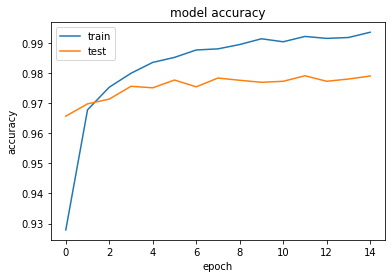

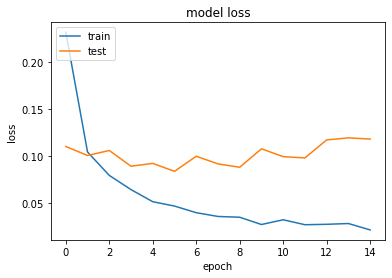

In [8]:
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
predicted_probability = model.predict(X_test_NN)
predicted_classes = np.argmax(predicted_probability, axis=-1)

correct_preds = np.nonzero(predicted_classes == y_test)[0]
incorrect_preds = np.nonzero(predicted_classes != y_test)[0]
print(f'{len(correct_preds)} classified correctly')
print(f'{len(incorrect_preds)} classified incorrectly')
print(f'{len(correct_preds) / len(y_test) * 100}% of test set classified correctly')

2022-04-09 09:58:25.730103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9794 classified correctly
206 classified incorrectly
97.94% of test set classified correctly


In [ ]:
print('Correctly classified:')
for i_correct in correct_preds[0:5]:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.bar(range(n_class), predicted_probability[i_correct], tick_label=range(n_class))
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i_correct], cmap='gray', interpolation='none')
    plt.title(f'Truth: {y_test[i_correct]}, Predicted: {predicted_classes[i_correct]}')
    plt.axis('off')
    plt.show()
    
print('Incorrectly classified:')
for i_incorrect in incorrect_preds[0:5]:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.bar(range(n_class), predicted_probability[i_incorrect], tick_label=range(n_class))
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i_incorrect], cmap='gray', interpolation='none')
    plt.title(f'Truth: {y_test[i_incorrect]}, Predicted: {predicted_classes[i_incorrect]}')
    plt.axis('off')
    plt.show()